In [3]:
from pyspark.sql.functions import max, expr
from pyspark.sql import SparkSession
# Building session now
spark = SparkSession.builder.appName('lol').getOrCreate()

In [ ]:
# Sample DataFrame
df = spark.createDataFrame([(1, 10), (2, 20), (3, 30)], ["id", "value"])

In [ ]:
df.show()

In [ ]:
# Find the maximum value in the "value" column
max_value = df.select(max("value")).collect()[0][0]

In [ ]:
# Divide each value in the "value" column by the maximum value
df = df.withColumn("value_normalized", expr("value / {}".format(max_value))).drop("value")

In [ ]:
# Show the resulting DataFrame
df.show()

In [ ]:
# Sample DataFrame with a "color" column
df = spark.createDataFrame([(1, "red"), (2, "blue"), (3, "green"), (4, "red")], ["id", "color"])

# Get a list of unique values in the "color" column
unique_colors = [row[0] for row in df.select("color").distinct().collect()]

# Print the list of unique values
print(unique_colors)

In [ ]:
from pyspark.sql.functions import when

# Sample DataFrame with a "color" column
df = spark.createDataFrame([(1, "red"), (2, "blue"), (3, "green"), (4, "red")], ["id", "color"])

# Define a mapping from color string to integer value
color_mapping = {"red": 1, "blue": 2, "green": 3, "yellow": 4}

# Assign a unique integer value to each color string
df = df.withColumn("color_int", (when(df["color"] == option, color_mapping[option]).otherwise(None) for option in color_mapping))
# Show the resulting DataFrame
df.show()

In [ ]:
# Sample DataFrame with a "color" column
df = spark.createDataFrame([(1, "red"), (2, "blue"), (3, "green"), (4, "red")], ["id", "color"])

# Get a list of unique values in the "color" column
unique_colors = [row[0] for row in df.select("color").distinct().collect()]

# Create a dictionary mapping unique string values to unique integer values
color_mapping = dict(zip(unique_colors, range(len(unique_colors))))

# Show the color mapping
print(color_mapping)


In [ ]:
from functools import reduce
from pyspark.sql.functions import when

# Create DataFrame
df = spark.createDataFrame([(1, "red"), (2, "blue"), (3, "green"), (4, "red")], ["id", "color"])

# Define a mapping from color string to integer value
color_mapping = {"red": 1, "blue": 2, "green": 3, "yellow": 4}

# Use list comprehension and reduce to create a single when() expression
when_expr = reduce(lambda a, b: a.when(df["color"] == b, color_mapping[b]), color_mapping, when(df["color"].isNull(), None))

# Add the new column to the DataFrame
df = df.withColumn("color_int", when_expr)

# Show the resulting DataFrame
df.show()


In [6]:
def get_string_mapping(col_name, dataframe):
    unique_strings = [row[0] for row in dataframe.select(col_name).distinct().collect()]
    mapping = dict(zip(unique_strings, range(len(unique_strings))))
    return mapping

In [3]:
from functools import reduce
from pyspark.sql.functions import when


In [4]:
def get_embedding(col_name, mapping, dataframe):
    when_expr = reduce(lambda a, b: a.when(dataframe[col_name] == b, mapping[b]),
                       mapping, when(dataframe[col_name].isNull(), None))
    dataframe = dataframe.withColumn(col_name + "_embed", when_expr)
    dataframe = dataframe.drop(col_name)
    return dataframe
    

In [34]:
def normalize_column(col_name, dataframe):
    max_value = dataframe.select(max(col_name)).collect()[0][0]
    dataframe = dataframe.withColumn(f"{col_name}_normalized", expr("{} / {}".format(col_name, max_value))).drop(col_name)
    return dataframe

In [4]:
data = spark.createDataFrame([(23, "apple"), (64, "banana"), (15, "orange"), (83, "banana"), (42, "kiwi")], ["integers", "fruits"])

In [5]:
data.show()

+--------+------+
|integers|fruits|
+--------+------+
|      23| apple|
|      64|banana|
|      15|orange|
|      83|banana|
|      42|  kiwi|
+--------+------+



In [7]:
mapping = get_string_mapping("fruits", data)
print(mapping)

{'kiwi': 0, 'orange': 1, 'apple': 2, 'banana': 3}


In [ ]:
data = embed_strings("fruits", mapping, data)

In [ ]:
data.show()

In [ ]:
data = normalize_column("integers", data)

In [ ]:
data.show()

In [ ]:
data = normalize_column("fruits_embed", data)

In [ ]:
data.show()

In [ ]:
# Seperate embedding for time (seconds past midnight)
# Get_column_names()
# Is_string_column()
# Create a pipeline from above functions (Handle_Dataset(dataframe) -> embedded + normalized dataframe)

In [7]:
from pyspark.sql.functions import hour, minute
def embed_time(df):
    # Convert to seconds since midnight
    df = df.withColumn('Time', hour('Time') * 3600 + minute('Time') * 60)
    return df

In [8]:
# Sample dataframe
df = spark.createDataFrame([('23:59',), ('13:45',), ('21:15',)], ['Time'])

In [9]:
df.show()

+-----+
| Time|
+-----+
|23:59|
|13:45|
|21:15|
+-----+



In [10]:
df = embed_time(df)

In [11]:
df.show()

+-----+
| Time|
+-----+
|86340|
|49500|
|76500|
+-----+



In [5]:
def get_col_names(df):
    col_names = []
    for col in df.dtypes:
        col_names.append((col[0], col[1]))
    return col_names

In [14]:
data = [("A", 1, "B", 1.0, "C", 1, 1.0),
        ("A", 2, "E", 2.0, "F", 2, 2.0),
        ("A", 3, "H", 3.0, "I", 3, 3.0),
        ("J", 4, "K", 4.0, "I", 4, 4.0),
        ("M", 5, "N", 5.0, "O", 5, 5.0)]
df = spark.createDataFrame(data, ['col1', 'col2','col3','col4','col5','col6','col7'])

In [7]:
df.show()

+----+----+----+----+----+----+----+
|col1|col2|col3|col4|col5|col6|col7|
+----+----+----+----+----+----+----+
|   A|   1|   B| 1.0|   C|   1| 1.0|
|   A|   2|   E| 2.0|   F|   2| 2.0|
|   A|   3|   H| 3.0|   I|   3| 3.0|
|   J|   4|   K| 4.0|   I|   4| 4.0|
|   M|   5|   N| 5.0|   O|   5| 5.0|
+----+----+----+----+----+----+----+



In [8]:
df_cols = get_col_names(df)

In [9]:
df_cols

[('col1', 'string'),
 ('col2', 'bigint'),
 ('col3', 'string'),
 ('col4', 'double'),
 ('col5', 'string'),
 ('col6', 'bigint'),
 ('col7', 'double')]

In [15]:
for col in df_cols:
    col_name = col[0] 
    if col[1] == 'string':
        mapping = get_string_mapping(col_name, df)
        df = get_embedding(col_name, mapping, df)
        df = normalize_column_2(col_name + "_embed", df)
    else:
        df = normalize_column_2(col_name, df)

In [16]:
df.show(vertical=False, truncate=False)

+----------+----+----------+----+--------------------+----+----+
|col1_embed|col2|col3_embed|col4|col5_embed          |col6|col7|
+----------+----+----------+----+--------------------+----+----+
|1.0       |-1.0|0.0       |-1.0|0.33333333333333326 |-1.0|-1.0|
|1.0       |-0.5|-0.5      |-0.5|-1.0                |-0.5|-0.5|
|1.0       |0.0 |1.0       |0.0 |1.0                 |0.0 |0.0 |
|0.0       |0.5 |-1.0      |0.5 |1.0                 |0.5 |0.5 |
|-1.0      |1.0 |0.5       |1.0 |-0.33333333333333337|1.0 |1.0 |
+----------+----+----------+----+--------------------+----+----+



In [51]:
df.printSchema()

root
 |-- col1_embed_normalized: double (nullable = true)
 |-- col2_normalized: double (nullable = true)
 |-- col3_embed_normalized: double (nullable = true)
 |-- col4_normalized: double (nullable = true)
 |-- col5_embed_normalized: double (nullable = true)
 |-- col6_normalized: double (nullable = true)
 |-- col7_normalized: double (nullable = true)



In [10]:
def normalize_column_2(col_name, dataframe):
    max_value = dataframe.select(max(col_name)).collect()[0][0]
    min_value = dataframe.select(min(col_name)).collect()[0][0]
    diff = max_value - min_value
    dataframe = dataframe.withColumn(f"{col_name}_normalized",
                                     expr("(({} - {}) / {}) * 2 - 1".format(col_name, min_value, diff))).drop(col_name)
    dataframe = dataframe.withColumnRenamed(col_name + "_normalized", col_name)
    return dataframe 

In [19]:
df.select(min("col1_embed")).collect()[0][0]

0

In [16]:
df.show()

+----+----+----+----+----+----+----------+
|col2|col3|col4|col5|col6|col7|col1_embed|
+----+----+----+----+----+----+----------+
|   1|   B| 1.0|   C|   1| 1.0|         2|
|   2|   E| 2.0|   F|   2| 2.0|         2|
|   3|   H| 3.0|   I|   3| 3.0|         2|
|   4|   K| 4.0|   I|   4| 4.0|         1|
|   5|   N| 5.0|   O|   5| 5.0|         0|
+----+----+----+----+----+----+----------+



In [12]:
from pyspark.sql.functions import min

ModuleNotFoundError: No module named 'folium'

In [5]:
from pyspark.sql.functions import hexbin

# create a DataFrame with longitude and latitude columns
df = spark.createDataFrame([(40.7128, -74.0060), (37.7749, -122.4194), (41.8781, -87.6298)], ["latitude", "longitude"])

# use hexbin to create hexagonal bins based on the longitude and latitude columns
hexbins = df.select(hexbin("longitude", "latitude").alias("hexagon"))

# group by the hexagonal bins and count the number of points in each bin
hexcounts = hexbins.groupBy("hexagon").count()

# show the resulting hexagonal bin counts
hexcounts.show()



ImportError: cannot import name 'hexbin'

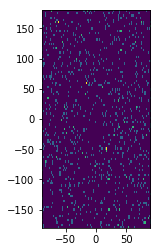

In [8]:
import pandas as pd
import numpy as np

# Generate random longitude and latitude data
np.random.seed(123)
longitude = np.random.uniform(low=-180.0, high=180.0, size=1000)
latitude = np.random.uniform(low=-90.0, high=90.0, size=1000)

# Create the dataframe
df = pd.DataFrame({'longitude': longitude, 'latitude': latitude})


# Create a 2D histogram using latitude and longitude as x and y
heatmap, xedges, yedges = np.histogram2d(df['latitude'], df['longitude'], bins=100)

# Set the limits of the plot
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot the heatmap
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()
